# Greedy Randomized Adaptive Search Procedure (GRASP)

El procedimiento de búsqueda adaptativa aleatoria codiciosa (también conocido como GRASP) es un algoritmo metaheurístico que se aplica habitualmente a los problemas de optimización combinatoria. El GRASP suele consistir en iteraciones formadas por construcciones sucesivas de una solución aleatoria codiciosa y posteriores mejoras iterativas de la misma a través de una búsqueda local. Las soluciones aleatorias codiciosas se generan añadiendo elementos al conjunto de soluciones del problema a partir de una lista de elementos clasificados por una función codiciosa según la calidad de la solución que alcanzarán. Para obtener variabilidad en el conjunto de soluciones codiciosas, los elementos candidatos bien clasificados suelen colocarse en una lista restringida de candidatos (RCL), y se eligen al azar al construir la solución. Este tipo de método de construcción aleatoria greedy también se conoce como heurística semi-greedy, descrita por primera vez en Hart y Shogan (1987).


<img src="https://i.ibb.co/9q4zgTz/GRASP.png" alt="GRASP" border="0">

Tomado de: **Glover, F. W., & Kochenberger, G. A. (Eds.). (2006). Handbook of metaheuristics (Vol. 57). Springer Science & Business Media.**

# Parámetros de prueba

Ahora vamos a construir un algoritmo GRASP para el problema del TSP. A continuación, se presentan los parámetros de prueba.

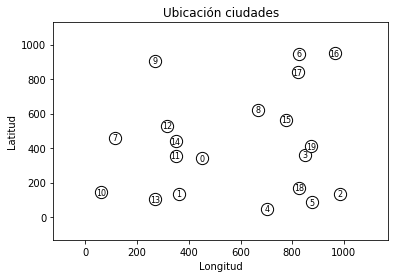

In [133]:
import numpy as np #Vamos a utilizar la libreria numpy
import operator #Paquete para ordenar un diccionario
import time #Paquete para medir el tiempo computacional
import matplotlib.pyplot as plt
import networkx as nx

def obj_cal(sol, c_ij):
    FO_1=0
    for x in range(len(sol)-1):
        FO_1+=c_ij[sol[x], sol[x+1]]
    return FO_1

def Grafica_Ruta(N, Route=[]):
    if len(Route) > 0:
        G = nx.DiGraph(Route)
    else:
        G = nx.DiGraph()
    G.add_nodes_from(N)
    options = {
        "font_size": 8,
        "node_size": 150,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }
    fig, ax = plt.subplots()
    nx.draw_networkx(G, coor, **options)
    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.xlabel('Longitud') 
    plt.ylabel('Latitud')
    plt.title('Ubicación ciudades') 
    plt.show()    
    
np.random.seed(8) 

n = 20 #Número de ciudades

size_grid = 1000 

#Coordenadas (x,y) de las ciudades
coor = {i:(np.random.randint(0, size_grid), np.random.randint(0, size_grid)) for i in range(n)} 

#Costo de ir de la ciudad i a la ciudad j (Distancia)
c_ij = {(i,j):(round(np.sqrt(((coor[i][0]-coor[j][0])**2)+((coor[i][1]-coor[j][1])**2)),0) if i!=j else 1000000) 
        for i in range(n) for j in range(n)}

N = range(n)
# Código para graficar las ciudades

Grafica_Ruta(N)

# Codificación

El TSP puede ser codificado con un vector de tamaño $n+1$. La posición del vector corresponde al orden en el que se visitan las ciudades y el contenido de la posición indica la ciudad que se está visitando. En esta codificación la posición 0 y n-1 sera el cuenta el depot (0) dado que se tiene que partir y regresar a esta ciudad obligatoriamente. 

Esta codificación también se puede realizar utilizando listas en Python. 

<img src="https://i.ibb.co/1rMb5Rf/Codificaci-n-TSP.png" alt="Codificaci-n-TSP" border="0">

# Algoritmo constructivo pseudo-aleatorizado

Hoy veremos cómo se genera un algoritmo constructivo pseudo-aleatorizado para el problema del TSP. Este algoritmo consiste en ir construyendo la solución utilizando una lista restringida de candidatos RCL. Esta lista contendrá los candidatos más prometedores a conformar la solución y se seleccionará uno al azar. En el siguiente código se encuentra el algoritmo constructivo.

<img src="https://i.ibb.co/1rLvFhw/ConsAlea.png" alt="ConsAlea" border="0">

In [134]:
def Constructivo_aleatorizado(c_ij, alpha):
    
    np.random.seed() 
    
    solucion = [0]
    Copia_cij = c_ij.copy()
    FO = 0
    Cabeza = 0
    
    Route = []
    for i in range(n):
        Copia_cij[i, 0] = 1000000
        
    while(len(solucion)<n):
    
        minimo = 99999
        maximo = -1
        for i in range(n):
            if Copia_cij[Cabeza,i]<minimo:
                minimo = Copia_cij[Cabeza, i]
                
            if Copia_cij[Cabeza,i]>maximo and Copia_cij[Cabeza,i] != 1000000:
                maximo = Copia_cij[Cabeza, i]
        
        RCL = []
        for i in range(n):
            if Copia_cij[Cabeza,i] <= minimo + alpha*(maximo-minimo) and Copia_cij[Cabeza,i] != 1000000:
                RCL.append(i)
        
        Index = np.random.randint(0, len(RCL))
        Cola = RCL[Index]
        
        FO += Copia_cij[Cabeza,Cola]
        
        for i in range(n):
            Copia_cij[i, Cola] = 1000000
        
        Copia_cij[Cabeza, Cola] = 1000000

        solucion.append(Cola)
        Route.append((Cabeza, Cola))
        Cabeza=Cola       

    FO+=c_ij[Cola, 0]
    Route.append((Cabeza, 0))
    solucion.append(0)
    
    return FO, Route, solucion

Ahora, vamos a ejecutar el algoritmo constructivo pseudo-aleatorizado utilizando un número de iteraciones. Se guardará la mejor solución encontrada en estas soluciones. 

La mejor solución encontrada es [0, 13, 4, 2, 5, 18, 3, 19, 15, 16, 6, 17, 8, 9, 12, 14, 11, 7, 10, 1, 0]
Es costo de la mejor solución es 4769.0
Tiempo de cómputo 4.025 segundos


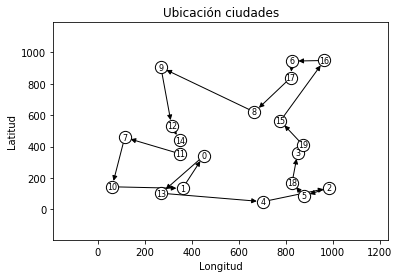

In [135]:
#------------------------------------------------Constructivo pseudo-aleatorizado -----------------------------------------

Iteraciones = 5000
Alpha = 0.5

Tiempo_inicio = time.time()

FO_cons = 1000000
Sol_cons = []
Route_cons = []

for i in range(Iteraciones):
    
    FO, Route, solucion = Constructivo_aleatorizado(c_ij, Alpha)
    
    if FO < FO_cons:
        Sol_cons = solucion.copy()
        Route_cons = Route.copy()
        FO_cons = FO

Tiempo_fin =time.time()-Tiempo_inicio

print(f"La mejor solución encontrada es {Sol_cons}")
print(f"Es costo de la mejor solución es {FO_cons}")
print(f"Tiempo de cómputo {round(Tiempo_fin,5)} segundos")
Grafica_Ruta(N, Route_cons)

# Búsqueda local

Para este algoritmo de búsqueda local se utilizarán los operadores de insert, swap y 2-opt todos en el mismo esquema de búsqueda. Se utilizará la filosofía de primera mejora y se realizará el mejor movimiento de los tres operadores estimados.

## Insert

El operador de Insert consiste en seleccionar una ciudad e insertarla en las diferentes posiciones de la ruta construida. En este caso, buscamos insertar lo que se encuentra en la posición $ii$ al frente de lo que esta en la posición $jj$. 

<img src="https://i.ibb.co/fMvZVSp/Insert.png" alt="Insert" border="0">

## Swap

El operador Swap consiste en intercambiar dos posiciones de la ruta construida. En este caso, buscamos intercambiar lo que se encuentra en la posición $ii$ con lo que se encuentra en la posiciòn $jj$. 

<img src="https://i.ibb.co/fMvZVSp/Insert.png" alt="Insert" border="0">

# 2-OPT

El algoritmo 2-opt es una de las heurísticas más básicas y ampliamente utilizadas para obtener una solución aproximada del problema TSP. 2-opt comienza con un recorrido inicial aleatorio y mejora el recorrido de forma incremental intercambiando 2 aristas en el recorrido con otras dos aristas.

<img src= "https://www.researchgate.net/profile/Haris-Hasic-3/publication/320799889/figure/fig6/AS:556188186181639@1509617005733/Example-of-2-opt-move.png">

Tomado de http://matejgazda.com/tsp-algorithms-2-opt-3-opt-in-python/

In [136]:
def _swap_2opt(route, i, k):
    """ Swapping the route """
    new_route = route[0:i]
    new_route.extend(reversed(route[i:k + 1]))
    new_route.extend(route[k + 1:])
    return new_route

def busqueda_local(solucion, c_ij, FO, Movimientos, Imprime = 0):
    print(f"Solucion inicial {solucion}, \n FO {FO}")
    repite = True
    while repite == True:

        Hubo_cambio = False

        for i in range(len(solucion)-2):
            ii = i + 1
            iii = ii + 1

            for j in range(len(solucion)-2):
                jj = j + 1
                jjj = jj + 1

                movs = {}

                if ii!=jj:

                    #Hace el insert
                    Actual_insert = c_ij[solucion[i], solucion[ii]] + c_ij[solucion[ii], solucion[iii]] + c_ij[solucion[jj],solucion[jjj]]
                    New_insert = c_ij[solucion[i], solucion[iii]] + c_ij[solucion[jj], solucion[ii]] + c_ij[solucion[ii], solucion[jjj]]
                    ahorro_insert = New_insert - Actual_insert

                    if ahorro_insert < 0:
                        movs[1] = ahorro_insert

                    if i < j:    
                        
                        #Hace el swap
                        if jj!=ii+1:
                            Actual_swap = c_ij[solucion[i], solucion[ii]] + c_ij[solucion[ii], solucion[iii]] + c_ij[solucion[j],solucion[jj]] + c_ij[solucion[jj],solucion[jjj]]                           
                            New_swap = c_ij[solucion[i], solucion[jj]] + c_ij[solucion[jj], solucion[iii]] + c_ij[solucion[j],solucion[ii]] + c_ij[solucion[ii],solucion[jjj]]
                        else:
                            Actual_swap = c_ij[solucion[i], solucion[ii]] + c_ij[solucion[jj],solucion[jjj]]                           
                            New_swap = c_ij[solucion[i], solucion[jj]] + c_ij[solucion[ii],solucion[jjj]]

                        ahorro_swap = New_swap - Actual_swap

                        if ahorro_swap < 0:
                            movs[2] = ahorro_swap


                        #Hace 2 OPT
                        Actual_2opt = c_ij[solucion[i], solucion[ii]] + c_ij[solucion[j], solucion[jj]]
                        New_2opt = c_ij[solucion[i], solucion[j]] + c_ij[solucion[ii], solucion[jj]]

                        ahorro_2opt = New_2opt - Actual_2opt

                        if ahorro_2opt < 0:
                            movs[3] = ahorro_2opt
                    
                    #Compara y hace el mejor movimiento de los 3 estimados
                    if len(movs)>0:
                        
                        movs1 = sorted(movs.items(), key=operator.itemgetter(1), reverse=True)

                        if movs1[0][0] == 1:
                            
                            if Imprime == 1: 
                            
                                print(f"Inserta {solucion[ii]}")
                                print(f"En frente de {solucion[jj]}")

                            solucion.insert(jj+1, solucion[ii])

                            if jj > ii:
                                solucion.pop(ii)
                            else:
                                solucion.pop(ii+1)

                            FO+=ahorro_insert
                            
                            if Imprime == 1: 
                                print(f"FO: {FO}")

                            Hubo_cambio  =True
                            break

                        elif movs1[0][0] == 2:
                            
                            if Imprime == 1: 
                                print(f"Swap de  {solucion[ii]}")
                                print(f"con {solucion[jj]}")

                            sol_copia = solucion.copy()

                            solucion[ii] = sol_copia[jj]
                            solucion[jj] = sol_copia[ii]

                            FO+=ahorro_swap
                            
                            if Imprime == 1: 
                                print(f"FO: {FO}")

                            Hubo_cambio  =True
                            break

                        elif movs1[0][0] == 3:
                            
                            if Imprime == 1:                             
                                print("2 opt de i = {ii}, k = {j}")

                            solucion = _swap_2opt(solucion, ii, j)
                            FO+=ahorro_2opt
                            
                            if Imprime == 1: 
                                print(f"FO: {FO}")

                            Hubo_cambio  =True
                            break

            if Hubo_cambio == True:
                break

        if Hubo_cambio == True:
            Movimientos+=1
            repite = True
        else:
            repite = False
            
    print(f"Solucion búsqueda local {solucion}, \n FO {FO}")
    
    return FO, solucion, Movimientos

Solucion inicial [0, 8, 16, 19, 5, 2, 3, 11, 13, 14, 12, 7, 1, 10, 18, 4, 15, 6, 17, 9, 0], 
 FO 7282.0
Solucion búsqueda local [0, 14, 12, 9, 6, 16, 17, 8, 15, 19, 3, 18, 2, 5, 4, 1, 13, 10, 7, 11, 0], 
 FO 4114.0
Solucion final [0, 14, 12, 9, 6, 16, 17, 8, 15, 19, 3, 18, 2, 5, 4, 1, 13, 10, 7, 11, 0], 
 FO 4114.0
Tiempo de cómputo GRASP 0.00796 segundos
Número de movimientos requeridos para converger 30


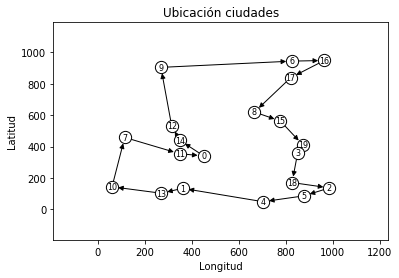

In [141]:
#----------------------------Ejecuta la búsqueda local sobre una construcción ----------------------------------------
#------------------------------------------      RCA + LS                   ----------------------------------------

Movimientos = 0
Tiempo_inicio = time.time()

FO, Route, solucion = Constructivo_aleatorizado(c_ij, 0.5)
FO, solucion, Movimientos = busqueda_local(solucion, c_ij, FO, Movimientos, 0)

Tiempo_fin =time.time()-Tiempo_inicio

print(f"Solucion final {solucion}, \n FO {FO}")
print(f"Tiempo de cómputo GRASP {round(Tiempo_fin,5)} segundos")
print(f"Número de movimientos requeridos para converger {Movimientos}")

Route_GRASP = []
for i in Sol_GRASP:
    Route_GRASP.append((Sol_GRASP[i], Sol_GRASP[i+1]))
    
Grafica_Ruta(N, Route_GRASP)

# Algoritmo GRASP

El algoritmo GRASP consta de dos etapas. La primera etapa consiste en la construcción de una solución y esta relacionada con el algoritmo de construcción pseudo-aleatorizada. La segunda etapa consiste en la mejora de la solución construida utilizando un algoritmo de búsqueda local. Estas dos etapas se ejecutan un número definido de iteraciones y se guarda la mejor solución encontrada a la que llamaremos **"Incumbente"**.

Ejecuta iteración 0
Solucion inicial [0, 7, 13, 1, 8, 14, 10, 11, 15, 6, 16, 19, 5, 3, 2, 4, 18, 17, 9, 12, 0], 
 FO 7265.0
Solucion búsqueda local [0, 14, 12, 9, 6, 16, 17, 8, 15, 19, 3, 18, 2, 5, 4, 1, 13, 10, 7, 11, 0], 
 FO 4114.0
Ejecuta iteración 1
Solucion inicial [0, 19, 18, 15, 14, 8, 3, 1, 11, 12, 7, 10, 4, 2, 5, 17, 6, 9, 16, 13, 0], 
 FO 8247.0
Solucion búsqueda local [0, 4, 5, 2, 18, 3, 19, 15, 8, 17, 16, 6, 9, 12, 14, 7, 10, 13, 1, 11, 0], 
 FO 4205.0
Ejecuta iteración 2
Solucion inicial [0, 7, 9, 11, 12, 1, 13, 14, 15, 19, 17, 16, 6, 3, 18, 4, 5, 2, 8, 10, 0], 
 FO 6819.0
Solucion búsqueda local [0, 4, 5, 2, 18, 3, 19, 15, 8, 17, 16, 6, 9, 12, 14, 7, 10, 13, 1, 11, 0], 
 FO 4205.0
Ejecuta iteración 3
Solucion inicial [0, 19, 2, 18, 8, 17, 16, 3, 15, 5, 4, 1, 14, 12, 11, 7, 13, 10, 9, 6, 0], 
 FO 7149.0
Solucion búsqueda local [0, 14, 12, 9, 6, 16, 17, 8, 15, 19, 3, 18, 2, 5, 4, 1, 13, 10, 7, 11, 0], 
 FO 4114.0
Ejecuta iteración 4
Solucion inicial [0, 7, 12, 11, 13, 1, 1

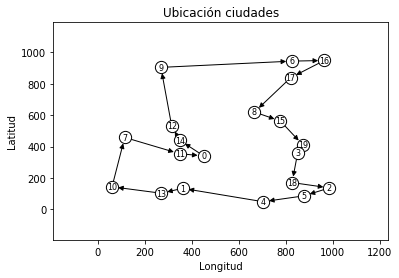

In [144]:
Iteraciones = 10
Movimientos = 0
Alpha = 0.5

Tiempo_inicio = time.time()

FO_GRAPS = 1000000
Sol_GRASP = []

for i in range(Iteraciones):
    
    print(f"Ejecuta iteración {i}")
    
    FO, Route, solucion = Constructivo_aleatorizado(c_ij, Alpha)
    FO, solucion, Movimientos = busqueda_local(solucion, c_ij, FO, Movimientos, 0)
    
    if FO < FO_GRAPS:
        Sol_GRASP = solucion.copy()
        FO_GRAPS = FO

Tiempo_fin =time.time()-Tiempo_inicio
        
print(f"Solucion final {Sol_GRASP}, \n FO {FO_GRAPS}")
print(f"Tiempo de cómputo GRASP {round(Tiempo_fin,5)} segundos")

Route_GRASP = []
for i in Sol_GRASP:
    Route_GRASP.append((Sol_GRASP[i], Sol_GRASP[i+1]))
    
Grafica_Ruta(N, Route_GRASP)

# Algoritmo GRASP con filtrado

Para evitar que se ejecute la búsqueda local sobre soluciones construidas de baja calidad se utiliza la estrategia de filtrado. Está estrategia a través de un **umbral** mide la calidad de la solución construida. Si la solución pasa el umbral el algoritmo de búsqueda local es ejecutado. De lo contrario, se comienza una nueva iteración. 

Esta estrategia es desarrollada para reducir el tiempo computacional del algoritmo. 

Ejecuta iteración 0
Solucion inicial [0, 8, 19, 17, 15, 3, 4, 18, 2, 5, 13, 7, 14, 10, 12, 11, 1, 9, 6, 16, 0], 
 FO 7153.0
Solucion búsqueda local [0, 11, 14, 12, 9, 7, 10, 13, 1, 4, 5, 2, 18, 3, 19, 15, 16, 6, 17, 8, 0], 
 FO 4299.0
Ejecuta iteración 1
Solucion inicial [0, 4, 2, 8, 17, 9, 14, 11, 10, 13, 12, 1, 5, 18, 3, 19, 15, 16, 6, 7, 0], 
 FO 6873.0
Solucion búsqueda local [0, 19, 3, 18, 2, 5, 4, 1, 13, 10, 7, 9, 6, 16, 17, 15, 8, 12, 14, 11, 0], 
 FO 4517.0
Ejecuta iteración 2
Ejecuta iteración 3
Ejecuta iteración 4
Ejecuta iteración 5
Ejecuta iteración 6
Solucion inicial [0, 3, 8, 15, 17, 6, 16, 9, 7, 12, 1, 10, 13, 14, 11, 4, 18, 2, 5, 19, 0], 
 FO 5770.0
Solucion búsqueda local [0, 8, 15, 17, 16, 6, 9, 12, 14, 11, 7, 10, 13, 1, 4, 5, 2, 18, 3, 19, 0], 
 FO 4566.0
Ejecuta iteración 7
Ejecuta iteración 8
Ejecuta iteración 9
Solucion inicial [0, 15, 8, 9, 14, 7, 10, 4, 5, 2, 18, 19, 3, 17, 6, 16, 11, 12, 1, 13, 0], 
 FO 5997.0
Solucion búsqueda local [0, 4, 5, 2, 18, 3, 19, 15,

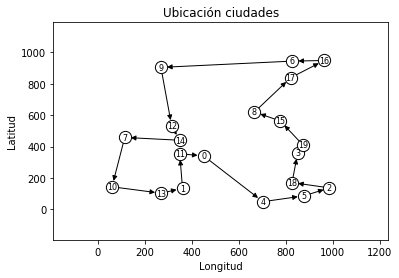

In [146]:
Iteraciones = 10
Movimientos = 0

Tiempo_inicio = time.time()

FO_GRAPS = 1000000
Umbral = 1000000
Sol_GRASP = []
maxFilter = 0
lambdaFilter = 0.2
Sol_reject = 0

for i in range(Iteraciones):
    
    print(f"Ejecuta iteración {i}")
    
    FO, Route, solucion = Constructivo_aleatorizado(c_ij, 0.5)
    
    if FO < Umbral:  
        
        Umbral = FO        
        FO, solucion, Movimientos = busqueda_local(solucion, c_ij, FO, Movimientos, 0)
        
    else:
        Sol_reject+=1
        maxFilter+=1
        if maxFilter == 5:
            Umbral = (1+ lambdaFilter)* Umbral
        
    if FO < FO_GRAPS:
        Sol_GRASP = solucion.copy()
        FO_GRAPS = FO

Tiempo_fin =time.time()-Tiempo_inicio
        
print(f"Solucion final {Sol_GRASP}, \n FO {FO_GRAPS}")
print(f"Tiempo de cómputo GRASP {round(Tiempo_fin,5)} segundos")
print(f"Número de soluciones rechazadas {Sol_reject}")

Route_GRASP = []
for i in Sol_GRASP:
    Route_GRASP.append((Sol_GRASP[i], Sol_GRASP[i+1]))
    
Grafica_Ruta(N, Route_GRASP)

# Algoritmo GRASP con filtrado y autoparametrización

Uno de los principales retos al utilizar un algoritmo GRASP es ¿Cual valor de $\alpha$ utilizar para crear mi RCL?. Este parámetro es crucial ya que de ahí depende todo el rendimiento del algoritmo y de las soluciones de puedo encontrar. 

Una forma de evitar este problema es haciendo una etapa de entrenamiento y prueba del algoritmo utilizando diferentes valores de $\alpha$. Lo que haremos es en la etapa de entrenamiento mirar como se comporta mi algoritmo con un valor de $\alpha$ dado. La idea es probarlos todos varias veces. Después en la etapa de prueba utilizaremos una distribución de probabilidad discreta creada con los diferentes rendimientos de los $\alpha$'s en la etapa de entrenamiento. Aquí seleccionaremos probabilísticamente los $\alpha$'s con mejores rendimientos. 

In [147]:
def general_alpha(iteraciones, indicador, Porc_Training, IndexAplhas, Count_Alphas):
    Train = iteraciones*Porc_Training
    
    if indicador <= Train:
        index = np.random.randint(0, len(IndexAplhas))
        alpha = IndexAplhas[index]
        
    else: 
        aleatorio=np.random.uniform(0, 1)
        suma = sum(Count_Alphas)
        
        aleatorio = aleatorio*suma
        ayuda = 0.0
        
        for i in range(len(Count_Alphas)):
            ayuda+=Count_Alphas[i]
            if aleatorio <= ayuda:
                index = i
                alpha = IndexAplhas[i]
                break
    
    return alpha, index

Ejecuta iteración 0
Solucion inicial [0, 12, 14, 11, 13, 1, 4, 2, 3, 19, 15, 8, 6, 17, 16, 18, 5, 7, 10, 9, 0], 
 FO 6137.0
Solucion búsqueda local [0, 11, 7, 10, 13, 1, 4, 5, 2, 18, 3, 19, 15, 8, 17, 16, 6, 9, 12, 14, 0], 
 FO 4114.0
Ejecuta iteración 1
Ejecuta iteración 2
Solucion inicial [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 6, 16, 9, 0], 
 FO 4294.0
Solucion búsqueda local [0, 11, 7, 10, 13, 1, 4, 5, 2, 18, 3, 19, 15, 8, 17, 16, 6, 9, 12, 14, 0], 
 FO 4114.0
Ejecuta iteración 3
Ejecuta iteración 4
Ejecuta iteración 5
Ejecuta iteración 6
Ejecuta iteración 7
Solucion inicial [0, 11, 14, 12, 7, 10, 13, 1, 4, 18, 5, 2, 3, 19, 15, 8, 17, 6, 16, 9, 0], 
 FO 4294.0
Solucion búsqueda local [0, 11, 7, 10, 13, 1, 4, 5, 2, 18, 3, 19, 15, 8, 17, 16, 6, 9, 12, 14, 0], 
 FO 4114.0
Ejecuta iteración 8
Ejecuta iteración 9
Solucion final [0, 11, 7, 10, 13, 1, 4, 5, 2, 18, 3, 19, 15, 8, 17, 16, 6, 9, 12, 14, 0], 
 FO 4114.0
Tiempo de cómputo GRASP 0.02399 segundos
Número de so

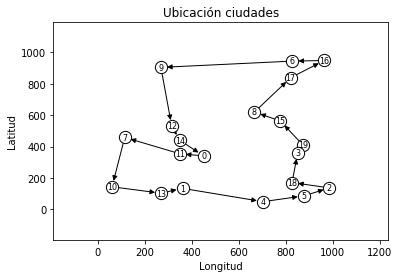

In [150]:
#                                                    Reactive GRASP + Filtering
Iteraciones = 10
Movimientos = 0
N_training = 0.3

Count_Alphas = solucion = np.zeros(11)
IndexAplhas = [(0 + i)/10 for i in range(11)]

Tiempo_inicio = time.time()

FO_GRAPS = 1000000
Umbral = 1000000
Sol_GRASP = []
maxFilter = 0
lambdaFilter = 0.2
Sol_reject = 0

for i in range(Iteraciones):
    
    print(f"Ejecuta iteración {i}")
    
    alpha, index_alpha = general_alpha(Iteraciones, i, N_training, IndexAplhas, Count_Alphas)
    
    FO, Route, solucion = Constructivo_aleatorizado(c_ij, alpha)
    
    Count_Alphas[index_alpha]+= (1.0/FO)
    
    if FO < Umbral:  
        
        Umbral = FO        
        FO, solucion, Movimientos = busqueda_local(solucion, c_ij, FO, Movimientos, 0)
        
    else:
        Sol_reject+=1
        maxFilter+=1
        if maxFilter == 5:
            Umbral = (1+ lambdaFilter)* Umbral
        
    if FO < FO_GRAPS:
        Sol_GRASP = solucion.copy()
        FO_GRAPS = FO

Tiempo_fin =time.time()-Tiempo_inicio
        
print(f"Solucion final {Sol_GRASP}, \n FO {FO_GRAPS}")
print(f"Tiempo de cómputo GRASP {round(Tiempo_fin,5)} segundos")
print(f"Número de soluciones rechazadas {Sol_reject}")

Route_GRASP = []
for i in Sol_GRASP:
    Route_GRASP.append((Sol_GRASP[i], Sol_GRASP[i+1]))
    
Grafica_Ruta(N, Route_GRASP)

# Implementación modelo matemático

A continuación se presenta la implementación del problema del TSP en Pulp

Costo de la ruta OF = 4114.0$
Tiempo de cómputo del modelo matemático 8.83124 segundos


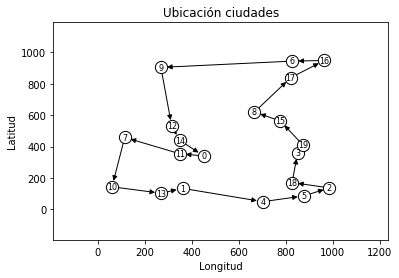

In [151]:
#!pip install PuLP
import pulp as lp

solucion_MIP = []

Tiempo_inicio = time.time()
prob = lp.LpProblem("TSP",lp.LpMinimize)

x=lp.LpVariable.dicts("x_var", [(i,j) for (i,j) in c_ij.keys()], lowBound=0,upBound=1,cat="Integer")
u=lp.LpVariable.dicts("u_var", [i for i in N], lowBound=0,cat="Continuous")

for i in N:
    prob += lp.lpSum(x[i,j] for j in N) == 1, "Lo que sale"+str(i)
    
for i in N:
    prob += lp.lpSum(x[j,i] for j in N) == 1, "Lo que entra"+str(i)
    
prob += u[0] ==1, "sale del depot"

for i in N:
    for j in N:
        if i!=j:
            if i!= 0 and j != 0:
                prob += u[i] - u[j] + 1 <= (len(N)-1)*(1-x[i,j])

prob += lp.lpSum(c_ij[i,j]*x[i,j] for (i,j) in c_ij.keys()), "OF"
prob.solve()
Tiempo_fin =time.time()-Tiempo_inicio

Route = []
print("Costo de la ruta OF = "+str(lp.value(prob.objective))+"$")
print(f"Tiempo de cómputo del modelo matemático {round(Tiempo_fin,5)} segundos")
FO_MIP = lp.value(prob.objective)
for (i,j) in c_ij.keys():
    if x[(i,j)].varValue > 0:
        Route.append((i,j))
Grafica_Ruta(N, Route)